# Master Data Science Data_VIZ
### WADE El Hadji Malick
### HAYKAL Fayad

In [2]:
import os

print(os.getcwd())
os.listdir()

/home/jovyan/work


['.ipynb_checkpoints',
 '.RData',
 '.Rhistory',
 'essais.txt',
 'Google_viz.csv',
 'README.md',
 'script_house.ipynb',
 'synthese.R',
 'Synthese_donnees_des_semis.csv',
 'Synthese_donnees_des_semis.xlsx',
 'synthese_V2.R',
 'WADE_Haykal.ipynb',
 'WADE_Haykal.py',
 'WADE_Haykal_Kaggle.ipynb',
 'WADE_Haykal_R.ipynb']

## 1. Nettoyage des données 

In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#path_School = "/users/mmath/wade/Bureau/Master_DS/Projets/Data_viz/Synthese_donnees_des_semis.csv"
path_Malick = "Synthese_donnees_des_semis.csv"

df = pd.read_csv(path_Malick,  sep='\t',  decimal=",")

df.head(10)

,Bancs,camera,zone,Pop,5_degres_C_TMG_h,5_degres_C_TMG_j,Aire_sous_la_courbe,15_j,16_j,17_j,18_j,19_j,20_j,21_j
0,3.0,1.0,11.0,Témoin,414.00,17.25,2652.0,4.0,16.0,20.0,24.0,32.0,36.0,40.0
1,3.0,2.0,11.0,Témoin,430.86,17.95,2652.0,0.0,4.0,4.0,12.0,24.0,28.0,28.0
2,3.0,3.0,11.0,Témoin,382.86,15.95,2652.0,8.0,12.0,20.0,20.0,20.0,24.0,28.0
3,3.0,4.0,11.0,Témoin,420.00,17.50,2652.0,4.0,4.0,4.0,4.0,12.0,16.0,16.0
4,4.0,1.0,11.0,Témoin,432.89,18.04,2646.0,4.0,4.0,16.0,16.0,24.0,32.0,36.0
5,4.0,2.0,11.0,Témoin,413.82,17.24,2646.0,8.0,12.0,20.0,32.0,36.0,36.0,44.0
6,4.0,3.0,11.0,Témoin,446.80,18.62,2646.0,4.0,4.0,8.0,16.0,20.0,24.0,40.0
7,4.0,4.0,11.0,Témoin,429.60,17.90,2646.0,0.0,0.0,8.0,8.0,12.0,20.0,20.0
8,3.0,1.0,11.0,Témoin,354.22,14.76,5731.2,16.0,28.0,28.0,32.0,36.0,36.0,36.0
9,3.0,2.0,26.0,Témoin,377.78,15.74,5731.2,12.0,20.0,20.0,20.0,32.0,36.0,36.0


In [4]:
print ("Lignes: " ,df.shape[0])
print ("Colonnes: " ,df.shape[1])
print("---------------")
print ("\nVariables:")
print(df.dtypes)
print ("\nValeurs uniques :")
print(df.nunique())

Lignes:  961
Colonnes:  14
---------------

Variables:
Bancs                  float64
camera                 float64
zone                   float64
Pop                     object
5_degres_C_TMG_h       float64
5_degres_C_TMG_j       float64
Aire_sous_la_courbe    float64
15_j                   float64
16_j                   float64
17_j                   float64
18_j                   float64
19_j                   float64
20_j                   float64
21_j                   float64
dtype: object

Valeurs uniques :
Bancs                    2
camera                   4
zone                    24
Pop                      6
5_degres_C_TMG_h       699
5_degres_C_TMG_j       365
Aire_sous_la_courbe    686
15_j                    17
16_j                    20
17_j                    22
18_j                    23
19_j                    23
20_j                    24
21_j                    25
dtype: int64


In [5]:
print ("\nTotal des valeurs manquantes :  ",df.isnull().sum().values.sum())

print("\n")
print(df.isnull().sum())


Total des valeurs manquantes :   16


Bancs                  1
camera                 1
zone                   1
Pop                    1
5_degres_C_TMG_h       2
5_degres_C_TMG_j       2
Aire_sous_la_courbe    1
15_j                   1
16_j                   1
17_j                   1
18_j                   1
19_j                   1
20_j                   1
21_j                   1
dtype: int64


On voit que notre jeux de données posséde des lignes avec avec au moins un e valeur manquante.  
On choisit de les supprimer, ce qui représente une perte de 2 lignes d'observations de données

In [6]:
Perte_de_donnees = df.shape[0]
df = df.dropna()

Perte_de_donnees = (Perte_de_donnees - df.shape[0])/100

print("En supprimant les lignes avec des valeurs manquantes, on a une perte de données de ", Perte_de_donnees,"%")

En supprimant les lignes avec des valeurs manquantes, on a une perte de données de  0.02 %


In [7]:
df.isnull().sum()

Bancs                  0
camera                 0
zone                   0
Pop                    0
5_degres_C_TMG_h       0
5_degres_C_TMG_j       0
Aire_sous_la_courbe    0
15_j                   0
16_j                   0
17_j                   0
18_j                   0
19_j                   0
20_j                   0
21_j                   0
dtype: int64

In [8]:
import seaborn as sns

Col_pairplot = ["5_degres_C_TMG_h", "5_degres_C_TMG_j", "Aire_sous_la_courbe", "15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(df, vars=Col_pairplot, hue="Pop", markers="+", height=3.5)
# g

## 2. Réduction de dimensions / ACP

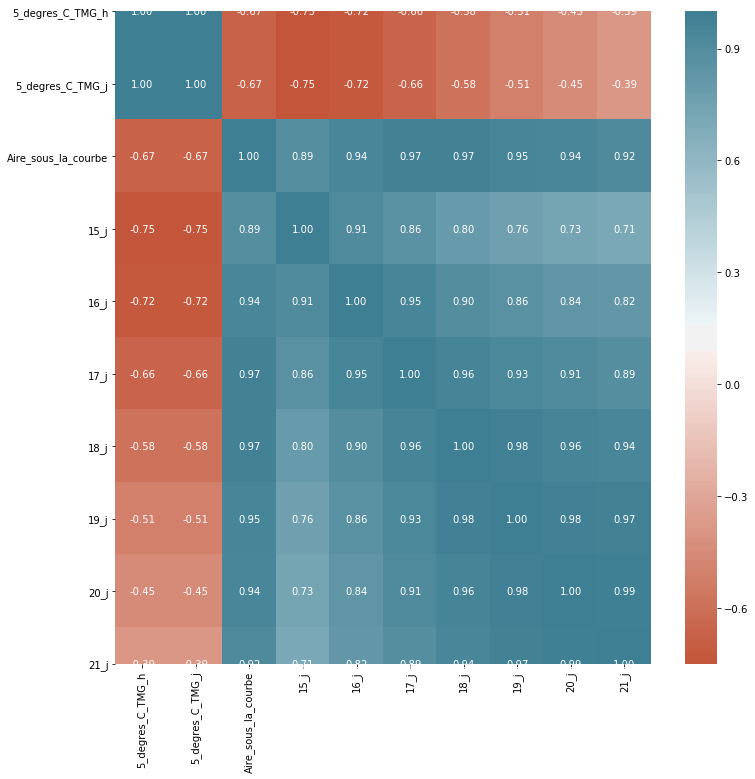

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(12, 12))

sns.heatmap(round(df[Col_pairplot].corr(),2), cmap=sns.diverging_palette(20, 220, n=200),annot=True, fmt=".2f")
plt.show()

In [10]:
df.drop(["5_degres_C_TMG_h"], axis = 1, inplace = True) 

In [11]:
#classe pour l'ACP
from sklearn.decomposition import PCA

Col_ACP = ["15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

#instanciation
acp = PCA(n_components=3)

#calculs
acp.fit(df[Col_ACP])
ACP_parielle = acp.transform(df[Col_ACP])

In [12]:
#proportions de variance associées aux axes
acp.explained_variance_ratio_

array([0.92431978, 0.05146348, 0.01074968])

In [13]:
#proportions de variance total associées aux axes
print("Proportion de variance associée à la premiére axe:",round(sum(acp.explained_variance_ratio_),4))

Proportion de variance associée à la premiére axe: 0.9865


In [14]:
df_partielle = pd.DataFrame(ACP_parielle, columns=['X1','X2', 'X3']) 
Col = ["Bancs", "camera", "zone", "Pop", "5_degres_C_TMG_j", "Aire_sous_la_courbe"]
df_ACP_parielle = pd.concat([df[Col], df_partielle], axis=1)

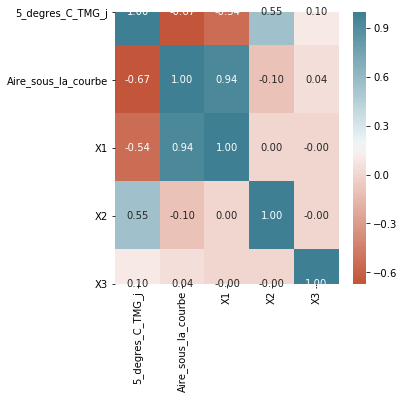

In [15]:
fig = plt.figure(1, figsize=(5, 5))

sns.heatmap(round(df_ACP_parielle[["5_degres_C_TMG_j", "Aire_sous_la_courbe", 'X1','X2','X3']].corr(),2), cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt=".2f")
plt.show()

In [16]:
df_ACP_parielle.drop(["Aire_sous_la_courbe"], axis = 1, inplace = True) 

In [17]:
print ("\nTotal des valeurs manquantes :  ",df_ACP_parielle.isnull().sum().values.sum())

print("\n")
print(df_ACP_parielle.isnull().sum())


Total des valeurs manquantes :   8


Bancs               1
camera              1
zone                1
Pop                 1
5_degres_C_TMG_j    1
X1                  1
X2                  1
X3                  1
dtype: int64


In [18]:
df_ACP_parielle = df_ACP_parielle.dropna()

In [19]:
df_ACP_parielle[["Bancs", "camera", "zone"]] = df_ACP_parielle[["Bancs", "camera", "zone"]].astype(int)
df_ACP_parielle.head()

,Bancs,camera,zone,Pop,5_degres_C_TMG_j,X1,X2,X3
0,3,1,11,Témoin,17.25,-29.347070,4.334175,0.787649
1,3,2,11,Témoin,17.95,-56.953843,7.857620,5.758046
2,3,3,11,Témoin,15.95,-46.399069,-7.491244,-1.413339
3,3,4,11,Témoin,17.50,-74.363199,-6.115965,5.094791
4,4,1,11,Témoin,18.04,-44.776618,6.841234,4.300309


## 3. Graphes avec une ACP partielle

In [20]:
print ("\nValeurs uniques :")
print(df.nunique())
df_ACP_parielle.head()


Valeurs uniques :
Bancs                    2
camera                   4
zone                    24
Pop                      6
5_degres_C_TMG_j       365
Aire_sous_la_courbe    685
15_j                    17
16_j                    20
17_j                    22
18_j                    23
19_j                    23
20_j                    23
21_j                    24
dtype: int64


,Bancs,camera,zone,Pop,5_degres_C_TMG_j,X1,X2,X3
0,3,1,11,Témoin,17.25,-29.347070,4.334175,0.787649
1,3,2,11,Témoin,17.95,-56.953843,7.857620,5.758046
2,3,3,11,Témoin,15.95,-46.399069,-7.491244,-1.413339
3,3,4,11,Témoin,17.50,-74.363199,-6.115965,5.094791
4,4,1,11,Témoin,18.04,-44.776618,6.841234,4.300309


     Bancs  camera  zone  Pop  5_degres_C_TMG_j         X1         X2  \
884      3       3    14  812             17.46   8.994540  10.545471   
885      3       4    46  812             16.45 -93.123431 -11.390697   
886      4       1    36  812             18.67  15.948001   7.077556   
887      4       1    25  812             16.17  27.949884   6.415491   
888      3       4    13  812             16.18  33.118670  17.019826   

            X3  
884  -7.682542  
885  -0.306052  
886  11.566082  
887  -2.226171  
888  -8.266869  


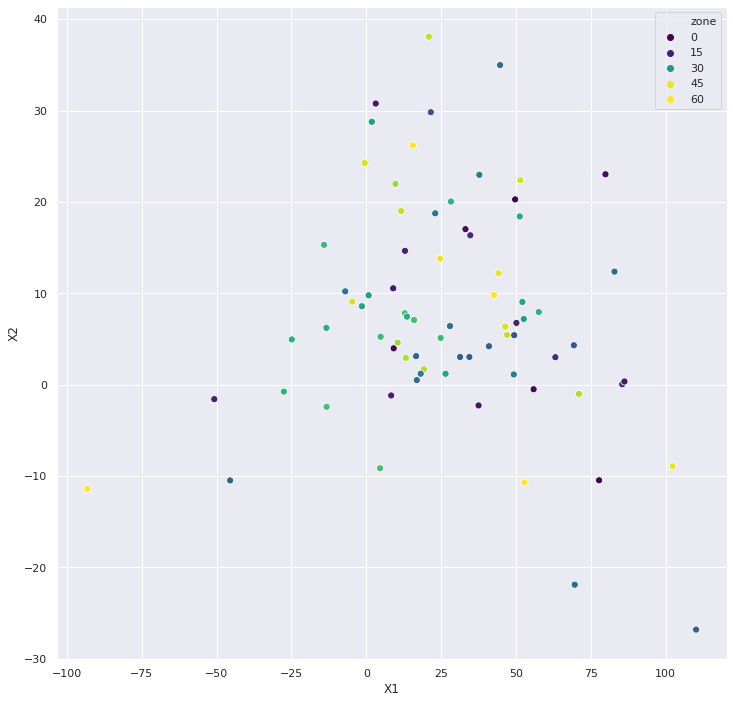

In [21]:
test = df_ACP_parielle[df_ACP_parielle["Pop"] == '812']
print(test.head())
Y = ["Bancs", "camera", "zone"]
i = 2

sns.set(style="darkgrid")
filled_markers = ('o', 'X', '<',  'D','8', 's', 'p', '*', 'h', '>', 'H', 'd', 'P', '^')
plt.figure(figsize=(12,12))
sns.scatterplot(x="X1", y="X2", hue=Y[i], palette="viridis", markers=filled_markers, data=test, s =50)

## 4. Prédictions

In [22]:
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.externals import joblib # save and load models

/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
# def object_to_int(dataframe_series):
#     """une simple fonction d'indexation"""
    
#     if dataframe_series.dtype=='object':
#         dataframe_series = LabelEncoder().fit_transform(dataframe_series)
#     return dataframe_series

In [24]:
Col_X = ["Bancs", "camera", "zone"]
Col_Y = ["15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

# df = df.apply(lambda x: object_to_int(x))
df[["Bancs", "camera", "zone"]] = df[["Bancs", "camera", "zone"]].astype(int)


df.head()

,Bancs,camera,zone,Pop,5_degres_C_TMG_j,Aire_sous_la_courbe,15_j,16_j,17_j,18_j,19_j,20_j,21_j
0,3,1,11,Témoin,17.25,2652.0,4.0,16.0,20.0,24.0,32.0,36.0,40.0
1,3,2,11,Témoin,17.95,2652.0,0.0,4.0,4.0,12.0,24.0,28.0,28.0
2,3,3,11,Témoin,15.95,2652.0,8.0,12.0,20.0,20.0,20.0,24.0,28.0
3,3,4,11,Témoin,17.50,2652.0,4.0,4.0,4.0,4.0,12.0,16.0,16.0
4,4,1,11,Témoin,18.04,2646.0,4.0,4.0,16.0,16.0,24.0,32.0,36.0


In [25]:
print ("Lignes: " ,df.shape[0])
print ("Colonnes: " ,df.shape[1])
print("---------------")
print ("\nVariables:")
print(df.dtypes)
print ("\nValeurs uniques :")
print(df.nunique())

Lignes:  959
Colonnes:  13
---------------

Variables:
Bancs                    int64
camera                   int64
zone                     int64
Pop                     object
5_degres_C_TMG_j       float64
Aire_sous_la_courbe    float64
15_j                   float64
16_j                   float64
17_j                   float64
18_j                   float64
19_j                   float64
20_j                   float64
21_j                   float64
dtype: object

Valeurs uniques :
Bancs                    2
camera                   4
zone                    24
Pop                      6
5_degres_C_TMG_j       365
Aire_sous_la_courbe    685
15_j                    17
16_j                    20
17_j                    22
18_j                    23
19_j                    23
20_j                    23
21_j                    24
dtype: int64


In [26]:
# jour = "16_j"
# df = df[df["Pop"] == "802"]

# X = df[Col_X]
# y = df[jour]


# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 40)

#### GradientBoosting

In [27]:
# #on crée un nouveau modèle gradient Boosting
# GB = GradientBoostingRegressor()

# #on crée un dictionnaire de toutes les valeurs que nous voulons tester
# param_grid_GB = {
#     "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.5],
#     "min_samples_leaf": [0.001, 0.005, 0.01],
#     "max_depth":[3, 5, 8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse"],
#     "subsample":[0.5, 0.75, 1.0],
#     "n_estimators":[10, 20,50, 100, 200],
#     }

# #on utilise gridsearch pour tester toutes les valeurs de param_grid
# GB_gscv = GridSearchCV(GB, param_grid_GB, cv=5, n_jobs=-1, verbose=10)

# #ajustement du modèle aux données
# t_debut = time.time()
# GB_gscv.fit(X_train,y_train)
# t_fin = time.time()

# temps_GB = (t_fin - t_debut)/60

# #print(GB_gscv.best_params_)

In [28]:
# from sklearn.metrics import mean_squared_error,max_error, explained_variance_score
# from math import sqrt

# rmse_test = sqrt(mean_squared_error(y_test, GB_gscv.best_estimator_.predict(X_test)))
# max_error = max_error(y_test, GB_gscv.best_estimator_.predict(X_test))

# print("L’erreur quadratique moyenne: %.4f" % rmse_test)
# print("L’erreur maximun: %.4f" % max_error)

In [29]:
# print("Moyenne: %.4f" %  y_test.mean())
# print("Mediane: %.4f" %  y_test.median())
# pd.value_counts(df[jour]).plot.bar()

In [30]:
# # Calculate feature importances
# importances = GB_gscv.best_estimator_.feature_importances_
# importances

In [31]:
# model = GB_gscv.best_estimator_
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

15_j
Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1928s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0581s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1841s.) Setting batch_size=26.
[Parallel(n_jobs=-1)]: Done 163 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 449 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1546s.) Setting batch_size=13.
[Parallel(n_jobs=-1)]: Done 735 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 930 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 109

[0.11385863 0.42864245 0.45749892]


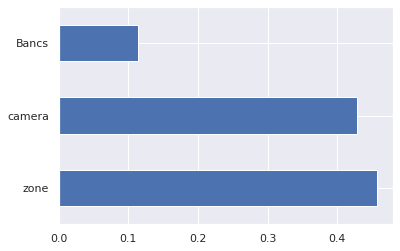

16_j
Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0174s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1011s.) Setting batch_size=11.
[Parallel(n_jobs=-1)]: Done 525 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 646 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 767 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 1031 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 1174 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   20.1s
[Paralle

[0.01633571 0.32675404 0.65691024]


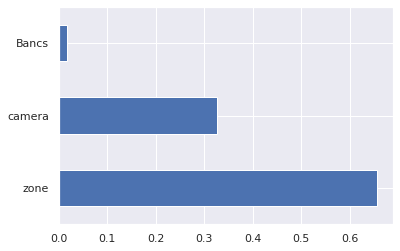

17_j
Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0175s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0476s.) Setting batch_size=11.
[Parallel(n_jobs=-1)]: Done 525 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 646 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 767 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 1031 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1174 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   20.7s
[Paralle

[0.08838533 0.21197827 0.6996364 ]


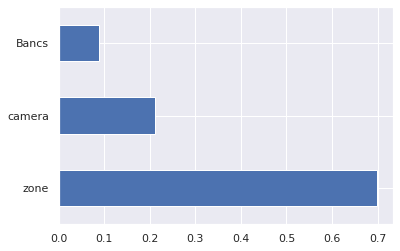

18_j
Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0188s.) Setting batch_size=20.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1097s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:   20.7s
[Parallel

[0.03078221 0.20175966 0.76745812]


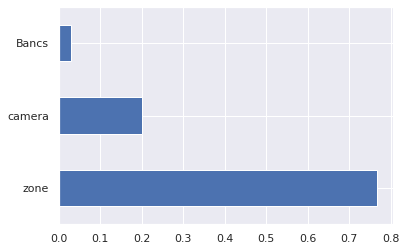

19_j
Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0160s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1367s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 908 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 1580 tasks      | elapsed:   22.8s
[Paralle

[0.0346117  0.18955458 0.77583372]


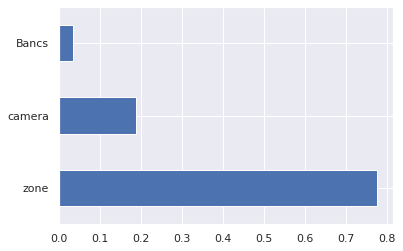

20_j
Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0174s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0425s.) Setting batch_size=11.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 503 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 613 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 734 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 855 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 998 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 1141 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 1306 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed:   21.8s
[Parallel

[0.05201638 0.15583641 0.79214721]


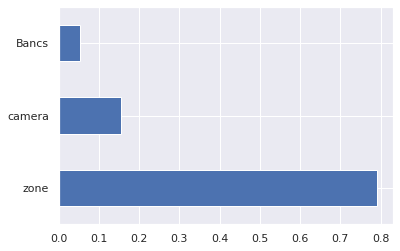

21_j
Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0181s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0634s.) Setting batch_size=11.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 503 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 613 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 734 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 855 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 998 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1141 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 1306 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed:   21.8s
[Parallel

[0.13560029 0.16972964 0.69467007]


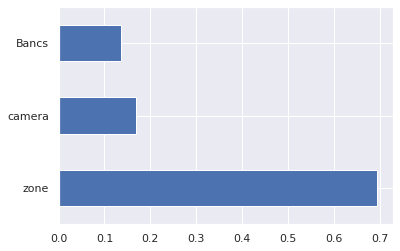

In [32]:
from sklearn.metrics import mean_squared_error,max_error, explained_variance_score
from math import sqrt

#df = df[df["Pop"] == "802"]
X = df[Col_X]

Importance_variable = {}

#on crée un nouveau modèle gradient Boosting
GB = GradientBoostingRegressor()

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_GB = {
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.5],
    "min_samples_leaf": [0.001, 0.005, 0.01],
    "max_depth":[3, 5, 8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.75, 1.0],
    "n_estimators":[10, 20,50, 100, 200],
    }

for jour in Col_Y:
    print(jour)
    y = df[jour]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 40)
    
    #on utilise gridsearch pour tester toutes les valeurs de param_grid
    GB_gscv = GridSearchCV(GB, param_grid_GB, cv=5, n_jobs=-1, verbose=10)
    
    #ajustement du modèle aux données
    t_debut = time.time()
    GB_gscv.fit(X_train,y_train)
    t_fin = time.time()
    
    temps_GB = (t_fin - t_debut)/60
    
    rmse_test = sqrt(mean_squared_error(y_test, GB_gscv.best_estimator_.predict(X_test)))

    model = GB_gscv.best_estimator_
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    Importance_variable[jour] = feat_importances
    feat_importances.nlargest(20).plot(kind='barh')
    plt.show()

In [33]:
# Importance_variables = pd.DataFrame({
#     'Model': ['Gradient Boosting','XGBoost','Random Forest','Decision Tree'],
#     'Score': [grad,xgrad,rf,dt],
#     'Variance_Score': [exp_grad,exp_xgrad,exp_rf,exp_dt],
#     'R2_score_adj' : [r2_score_adj_grad,r2_score_adj_xgrad,r2_score_adj_rf,r2_score_adj_dt],
#     'MAE': [MAE_grad,MAE_xgrad,MAE_rf,MAE_dt],
#     'RMSE' : [RMSE_grad, RMSE_xgrad, RMSE_rf, RMSE_dt],
#     'MedAE' : [MedAE_grad, MedAE_xgrad, MedAE_rf, MedAE_dt],
#     'Max_Error': [max_grad,max_xgrad,max_rf,max_dt]})
    
# models_cross.sort_values(by='Score', ascending=False)

In [47]:
Importance_variable['21_j']

Bancs     0.13560
camera    0.16973
zone      0.69467
dtype: float64

In [51]:
Importance_variable_df = pd.concat([Importance_variable['15_j'],
                                    Importance_variable['16_j'],
                                    Importance_variable['17_j'],
                                    Importance_variable['18_j'],
                                    Importance_variable['19_j'],
                                    Importance_variable['20_j'],
                                    Importance_variable['21_j']], axis = 1)
Importance_variable_df = Importance_variable_df.set_axis(Col_Y, axis=1, inplace=False)
Importance_variable_df.index.names = ['Effet']

In [52]:
Importance_variable_df

,15_j,16_j,17_j,18_j,19_j,20_j,21_j
Effet,,,,,,,
Bancs,0.113859,0.016336,0.088385,0.030782,0.034612,0.052016,0.13560
camera,0.428642,0.326754,0.211978,0.201760,0.189555,0.155836,0.16973
zone,0.457499,0.656910,0.699636,0.767458,0.775834,0.792147,0.69467
